In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textblob as tb
%matplotlib inline

In [3]:
np.random.seed(100)

In [4]:
labels = pd.read_csv('hygiene.dat.labels', names=['indicator'])
labels.head()

,indicator
0,1
1,1
2,1
3,0
4,0


In [5]:
test_labels = labels[labels.indicator == '[None]']
len(test_labels)

12753

In [213]:
test_labels.index

Int64Index([  546,   547,   548,   549,   550,   551,   552,   553,   554,
              555,
            ...
            13289, 13290, 13291, 13292, 13293, 13294, 13295, 13296, 13297,
            13298],
           dtype='int64', length=12753)

In [6]:
len(labels)

13299

In [7]:
train_labels = labels[labels.indicator != '[None]']

In [8]:
len(train_labels)

546

In [9]:
train_raw_data = pd.read_csv('train_raw_data.csv')
train_raw_data.head()

,total_char_length,total_num_words,good,food,place,like,great,just,really,service,...,num_words_times_rating,char_length_times_rating,num_reviews_times_polarity,num_words_times_polarity,char_length_times_polarity,num_reviews_times_subjectivity,num_words_times_subjectivity,char_length_times_subjectivity,ave_rating_times_polarity,ave_rating_times_subjectivity
0,3694,690,1,2,4,4,4,1,0,1,...,2760.000000,14776.000000,0.642501,110.831415,593.349636,2.314622,399.272358,2137.553757,0.642501,2.314622
1,11662,2177,11,14,13,9,12,6,8,8,...,8811.666667,47203.333338,3.824766,396.500728,2124.019979,13.091253,1357.126564,7270.009185,0.737200,2.523257
2,10122,1935,11,22,9,6,9,9,10,9,...,6020.000000,31490.666665,2.095971,289.693178,1515.387262,7.886049,1089.964580,5701.613167,0.465771,1.752455
3,28499,5264,37,40,26,19,19,16,18,20,...,21523.911112,116529.244448,10.982426,1376.464106,7452.099270,23.860150,2990.472136,16190.247987,1.069189,2.322893
4,4636,888,8,11,8,2,6,4,2,8,...,2727.428571,14239.142855,2.343567,173.423983,905.398180,6.610897,489.206349,2554.009724,0.599842,1.692075


In [10]:
test_raw_data = pd.read_csv('test_raw_data.csv')
test_raw_data.head()

,total_char_length,total_num_words,good,food,place,like,great,just,really,service,...,num_words_times_rating,char_length_times_rating,num_reviews_times_polarity,num_words_times_polarity,char_length_times_polarity,num_reviews_times_subjectivity,num_words_times_subjectivity,char_length_times_subjectivity,ave_rating_times_polarity,ave_rating_times_subjectivity
0,8620,1680,13,4,13,6,8,6,3,3,...,6960.000000,35711.428573,3.336565,431.186885,2212.399375,7.361688,951.356648,4881.365661,1.063301,2.346033
1,304,58,0,0,1,0,0,0,0,0,...,290.000000,1520.000000,0.013839,0.802679,4.207143,0.691964,40.133929,210.357143,0.069196,3.459821
2,5454,1022,9,7,3,1,3,1,3,1,...,3066.000000,16362.000000,1.325417,270.915325,1445.765343,3.213685,656.877311,3505.488115,0.795250,1.928211
3,304,55,3,1,1,1,0,0,0,1,...,183.333333,1013.333333,0.941667,25.895833,143.133333,1.212500,33.343750,184.300000,1.569444,2.020833
4,10580,2011,14,6,11,10,10,9,11,3,...,7239.600000,38088.000000,3.982512,533.922130,2808.998578,8.082639,1083.612404,5700.954367,0.955803,1.939833


In [12]:
test_raw_data.shape

(12753, 56748)

In [13]:
train_raw_data.shape

(546, 56748)

## Transform the data

In [14]:
from sklearn.cross_validation import train_test_split

/Users/apple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X =StandardScaler()

In [17]:
train_trans_data = sc_X.fit_transform(train_raw_data)
test_trans_data = sc_X.fit_transform(test_raw_data)

In [18]:
train_labels = labels[labels.indicator != '[None]']

In [19]:
train_labels.head()

,indicator
0,1
1,1
2,1
3,0
4,0


In [20]:
train_labels = train_labels['indicator']

In [21]:
train_labels.head()

0    1
1    1
2    1
3    0
4    0
Name: indicator, dtype: object

In [22]:
train_labels.values

array(['1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1',
       '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1

In [23]:
train_labels_array = np.array([int(number) for number in train_labels.values])

In [24]:
train_labels_array

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0,

In [25]:
train_labels_array = train_labels_array.reshape((len(train_labels_array), 1))

In [26]:
train_labels_array

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [27]:
train_trans_data

array([[-0.40178832, -0.40778474, -0.7081051 , ..., -0.38554371,
        -0.21701657,  0.63261749],
       [ 0.36235755,  0.34573956,  0.22509641, ...,  0.49923838,
        -0.00584666,  1.05438243],
       [ 0.21466872,  0.22310817,  0.22509641, ...,  0.22886317,
        -0.61110772, -0.50382825],
       ..., 
       [ 0.07072006,  0.0959161 ,  0.31841656, ...,  0.0399662 ,
        -0.10080625, -0.32038843],
       [-0.08742208, -0.08093661,  0.03845611, ..., -0.08155766,
         0.90377883,  0.81714534],
       [ 0.94975633,  0.91683699,  0.59837701, ...,  0.99345369,
        -0.16792827,  0.25046631]])

In [28]:
X_train, X_validation, y_train, y_test = train_test_split(train_trans_data, train_labels_array,
                                                         test_size = 0.2, random_state = 42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [30]:
clf.fit(X_train, y_train)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
predictions = clf.predict(X_validation)

In [32]:
from sklearn.metrics import accuracy_score, f1_score

In [33]:
accuracy_score(y_test, predictions)

0.5636363636363636

In [34]:
f1_score(y_test, predictions)

0.52941176470588236

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [36]:
cm

array([[35, 10],
       [38, 27]])

# Validate with k fold

In [37]:
from sklearn.cross_validation import KFold

In [38]:
train_trans_data

array([[-0.40178832, -0.40778474, -0.7081051 , ..., -0.38554371,
        -0.21701657,  0.63261749],
       [ 0.36235755,  0.34573956,  0.22509641, ...,  0.49923838,
        -0.00584666,  1.05438243],
       [ 0.21466872,  0.22310817,  0.22509641, ...,  0.22886317,
        -0.61110772, -0.50382825],
       ..., 
       [ 0.07072006,  0.0959161 ,  0.31841656, ...,  0.0399662 ,
        -0.10080625, -0.32038843],
       [-0.08742208, -0.08093661,  0.03845611, ..., -0.08155766,
         0.90377883,  0.81714534],
       [ 0.94975633,  0.91683699,  0.59837701, ...,  0.99345369,
        -0.16792827,  0.25046631]])

In [39]:
len(train_trans_data)

546

In [40]:
def run_kfold(clf):
    kf = KFold(546, n_folds = 10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train,X_test = train_trans_data[train_index], train_trans_data[test_index]
        y_train,y_test = train_labels_array[train_index], train_labels_array[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        f1score = f1_score(y_test,predictions)
        outcomes.append(f1score)
        print ("Fold {0} accuracy: {1}".format(fold, f1score))
    
    mean_outcome = np.mean(outcomes)
    print ("Mean Accuracy: {0}".format(mean_outcome))   

In [41]:
run_kfold(clf)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Fold 1 accuracy: 0.48
Fold 2 accuracy: 0.368421052632
Fold 3 accuracy: 0.571428571429
Fold 4 accuracy: 0.610169491525
Fold 5 accuracy: 0.44
Fold 6 accuracy: 0.489795918367
Fold 7 accuracy: 0.541666666667
Fold 8 accuracy: 0.45
Fold 9 accuracy: 0.45
Fold 10 accuracy: 0.380952380952
Mean Accuracy: 0.478243408157


In [42]:
## the classifier is not very useful. We want to select important features.

# Feature engineering---find the most important features

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
def RF_model_fit(n):
    return RandomForestClassifier(n_estimators = n).fit(train_trans_data, train_labels_array)

In [45]:
def GB_model_fit(n, m):
    return GradientBoostingClassifier(n_estimators = n, max_depth = m).fit(train_trans_data, train_labels_array)

In [46]:
model_50_rf = RF_model_fit(50)
model_100_rf = RF_model_fit(100)
model_200_rf = RF_model_fit(200)
#model_500_rf =  RF_model_fit(500)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [47]:
#model_50_6_gb = GB_model_fit(50,6)
#model_100_6_gb = GB_model_fit(100,6)
model_200_6_gb = GB_model_fit(200,6)
#model_500_6_gb = GB_model_fit(500,6)

/Users/apple/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
#model_50_6_gb = GB_model_fit(50,6)
model_100_6_gb = GB_model_fit(100,6)
#model_200_6_gb = GB_model_fit(200,6)
#model_500_6_gb = GB_model_fit(500,6)

In [93]:
#model_50_9_gb = GB_model_fit(50,9)
#model_100_9_gb = GB_model_fit(100,9)
model_200_9_gb = GB_model_fit(200,9)
#model_500_9_gb = GB_model_fit(500,9)

In [98]:
model_50_3_gb = GB_model_fit(50,3)
#model_100_9_gb = GB_model_fit(100,9)
#model_200_9_gb = GB_model_fit(200,9)
#model_500_9_gb = GB_model_fit(500,9)

In [49]:
def plot_top_importance(model):
    plt.style.use('fivethirtyeight')
    ax = pd.DataFrame({'importance': model.feature_importances_},
                     index = train_raw_data.columns).sort_values('importance',
                    ascending = True).tail(20).plot(kind = 'barh', legend = False,
                                                   figsize = (20, 10),
                                                   fontsize = 17,
                                                   title = 'Top 20 Most Important Features' )
    ax.tick_params(axis = 'x', colors = 'blue')
    ax.tick_params(axis = 'y', colors = 'blue')
   # ax.xaxis.label.set_colors('blue')
    plt.tight_layout()
    

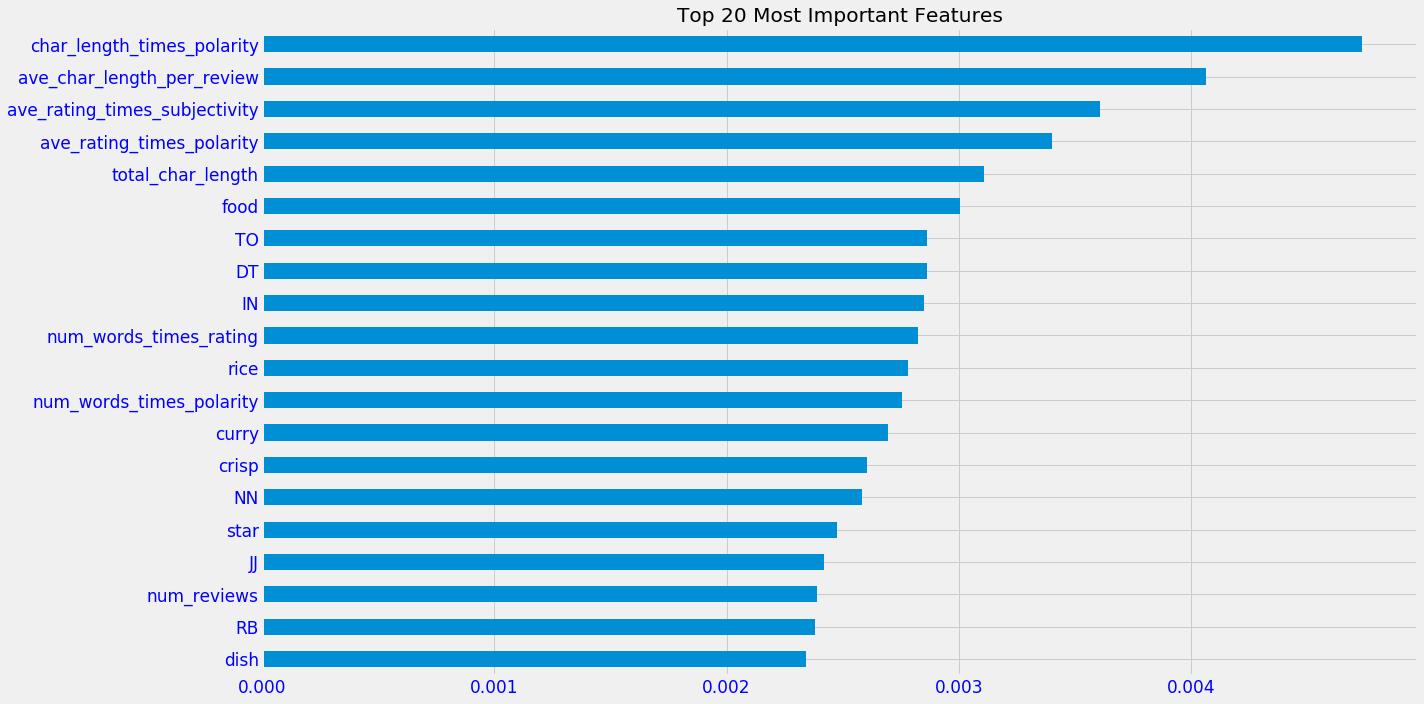

In [50]:
plot_top_importance(model_50_rf)

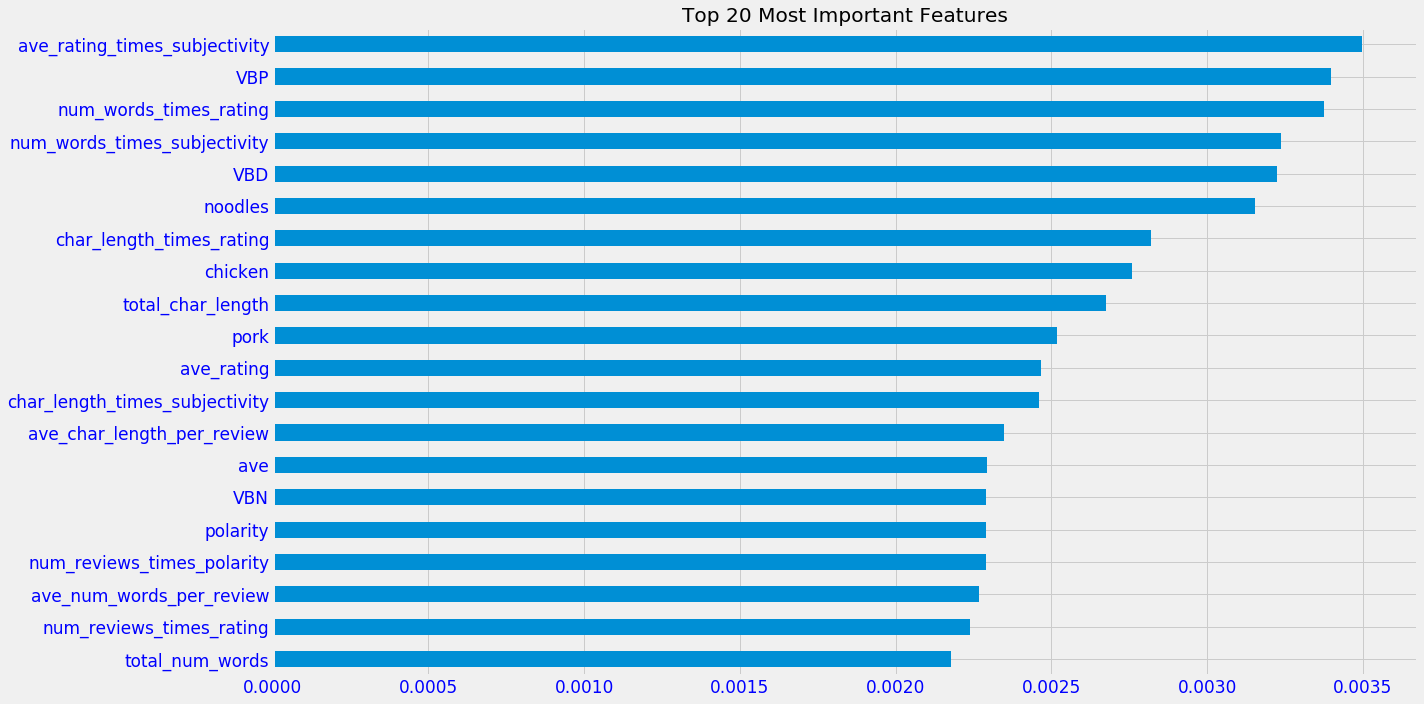

In [51]:
plot_top_importance(model_100_rf)

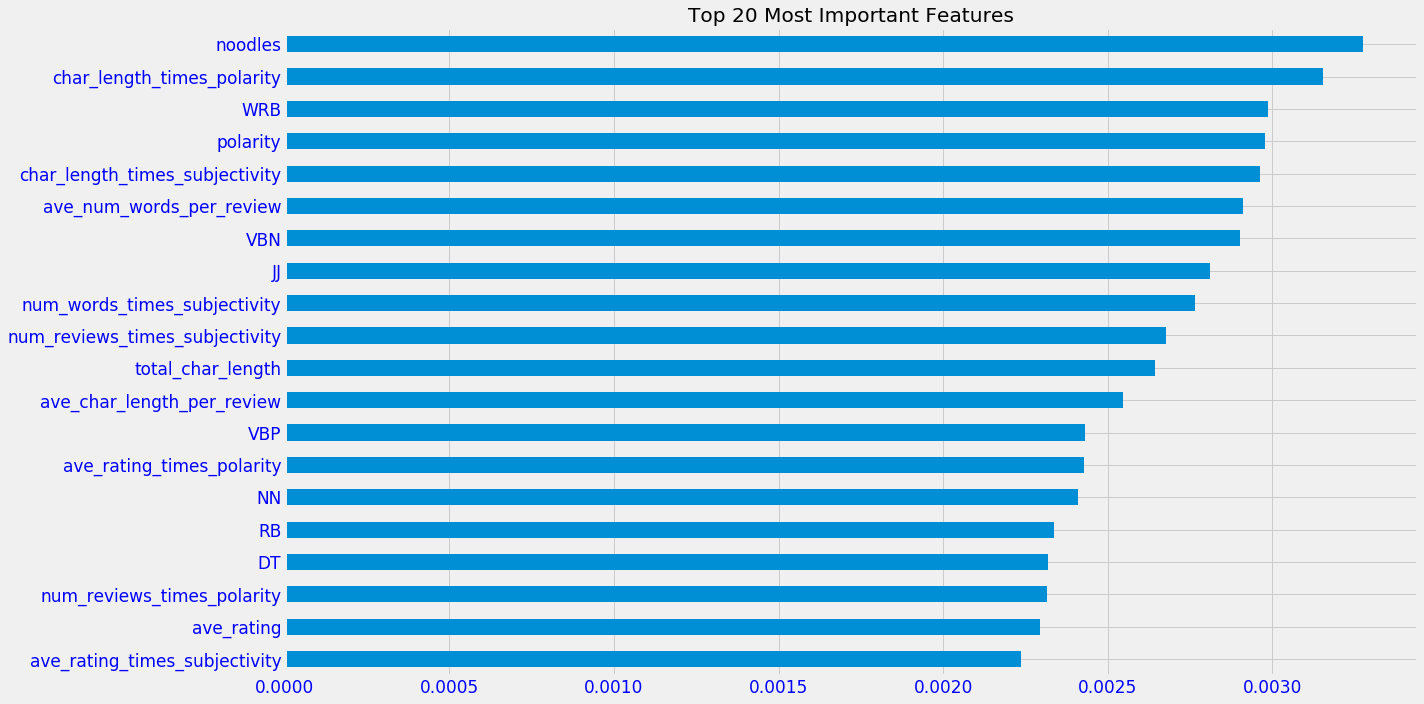

In [52]:
plot_top_importance(model_200_rf)

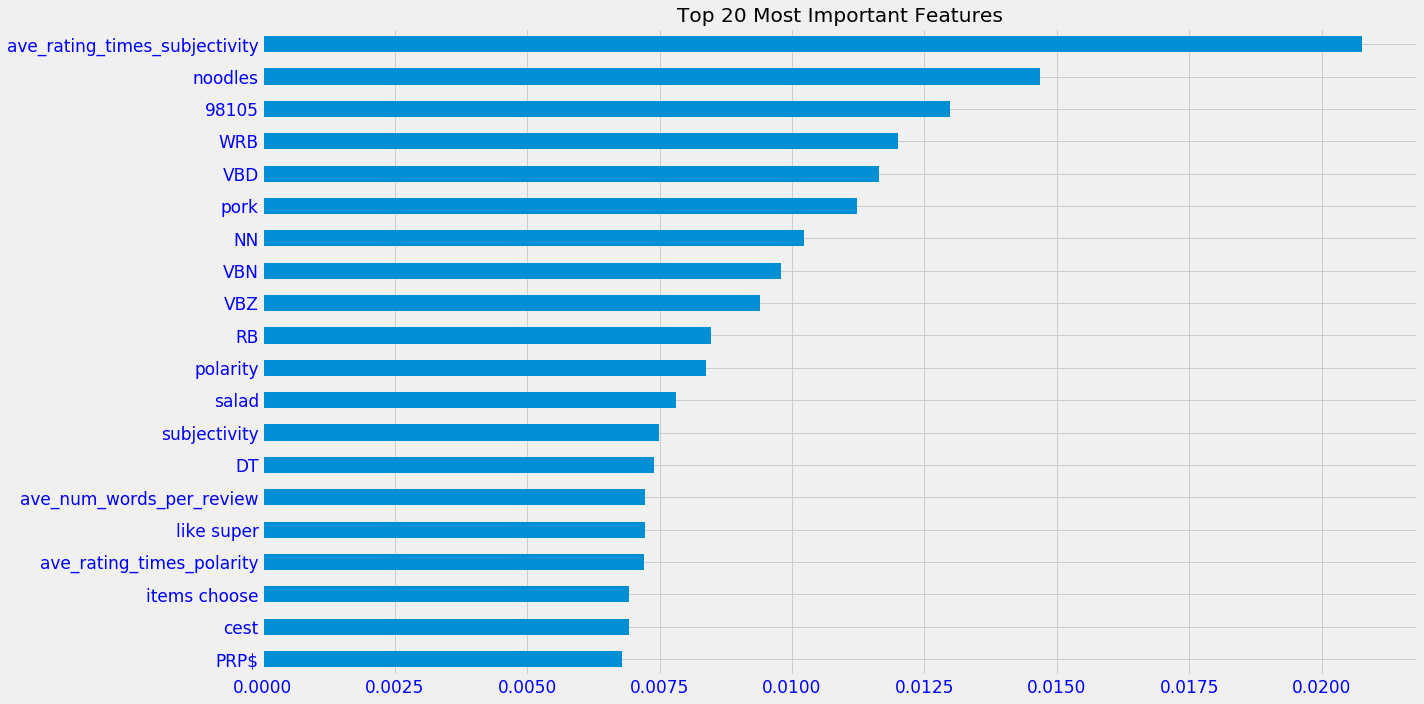

In [53]:
plot_top_importance(model_200_6_gb)

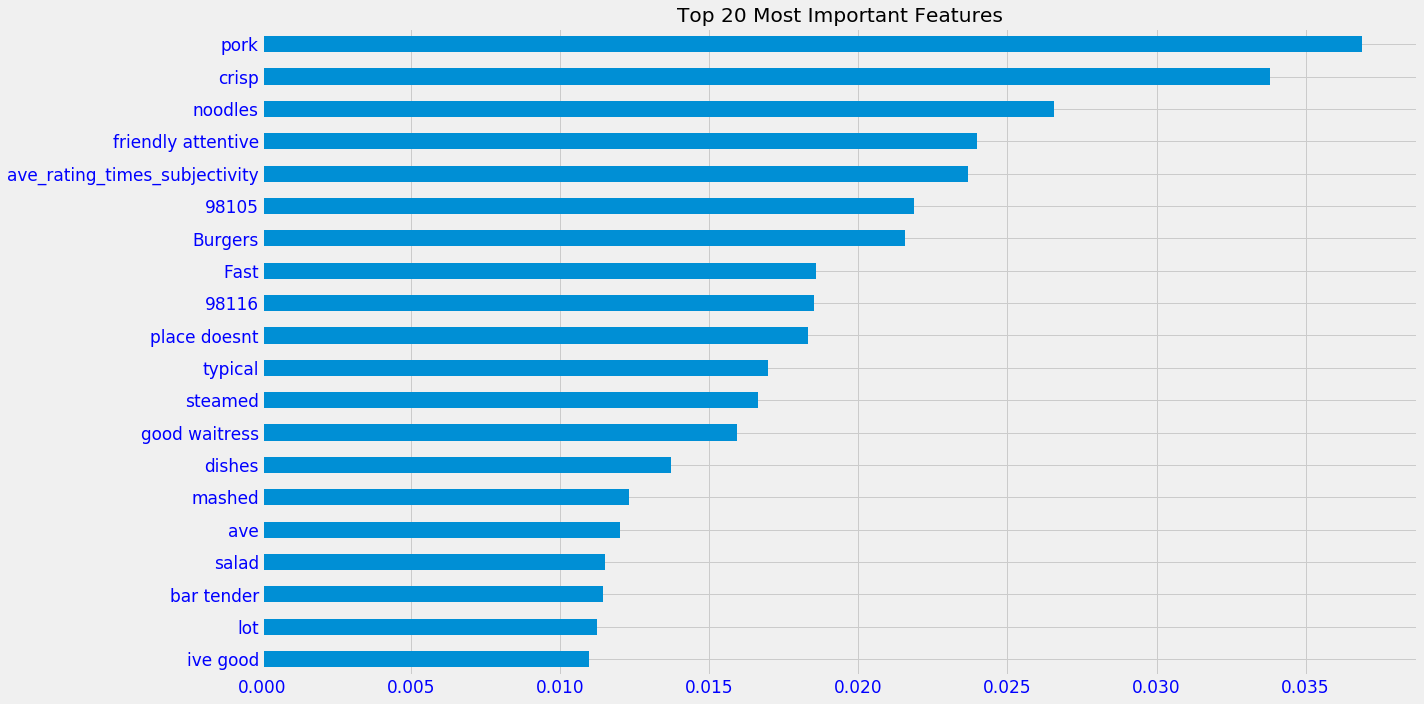

In [99]:
plot_top_importance(model_50_3_gb)

In [55]:
#plot_top_importance(model_50_6_gb)

In [56]:
#plot_top_importance(model_100_3_gb)

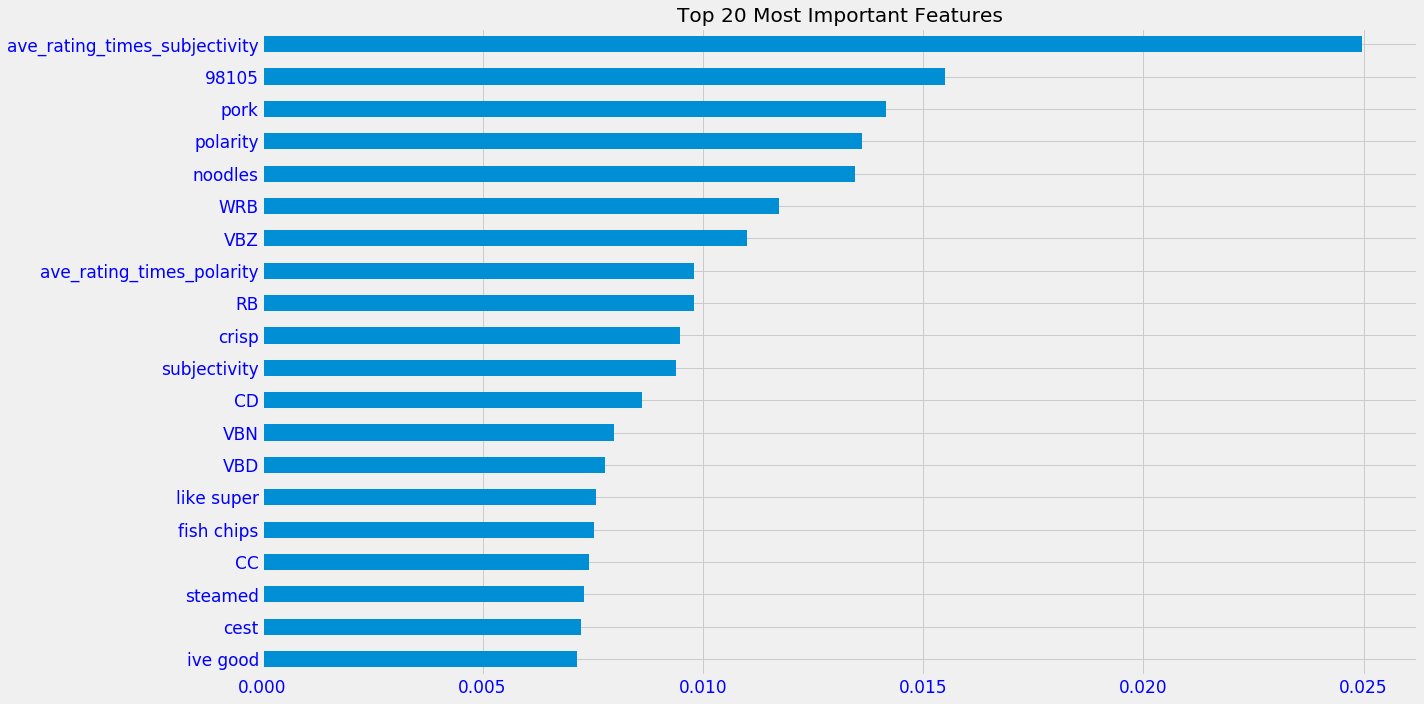

In [95]:
plot_top_importance(model_100_6_gb)

In [59]:
#plot_top_importance(model_500_6_gb)

In [60]:
#plot_top_importance(model_500_9_gb)

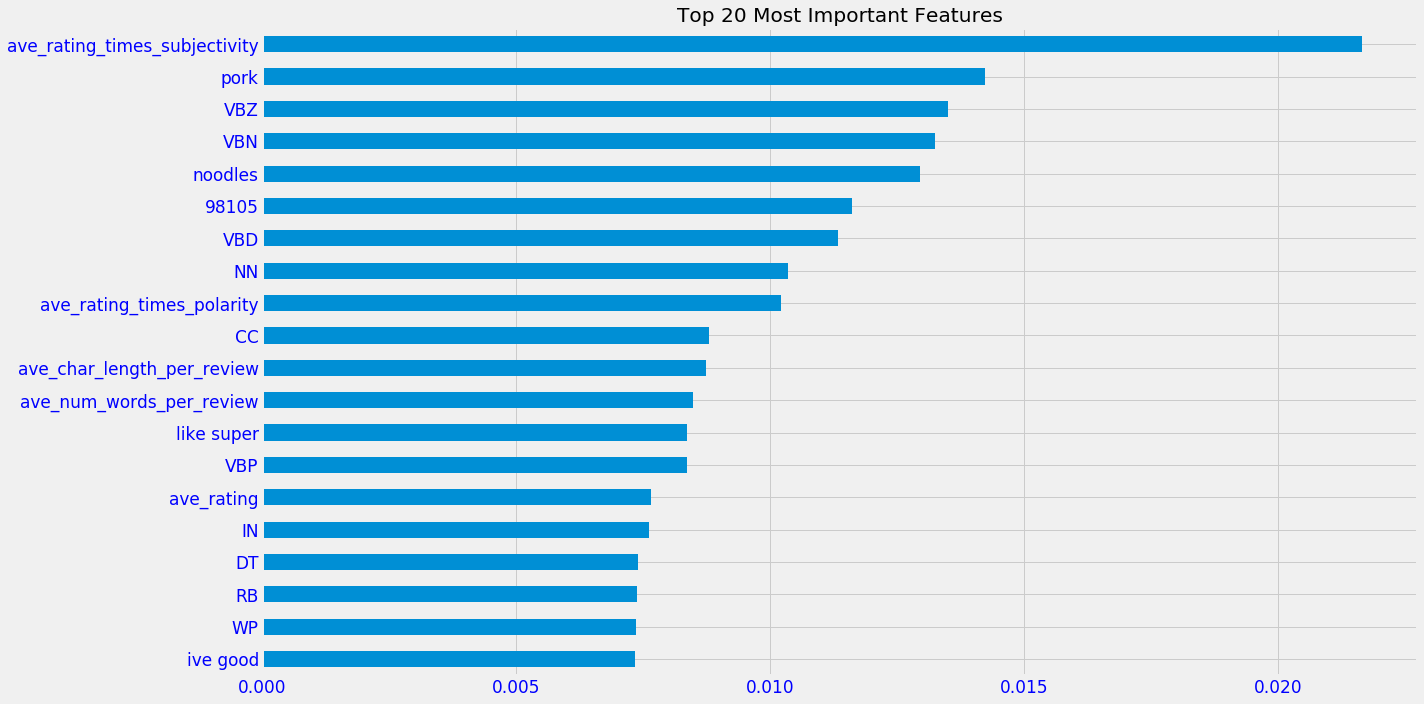

In [96]:
plot_top_importance(model_200_9_gb)

In [67]:
feature_table_index = train_raw_data.columns
feature_table_index

Index([u'total_char_length', u'total_num_words', u'good', u'food', u'place',
       u'like', u'great', u'just', u'really', u'service',
       ...
       u'num_words_times_rating', u'char_length_times_rating',
       u'num_reviews_times_polarity', u'num_words_times_polarity',
       u'char_length_times_polarity', u'num_reviews_times_subjectivity',
       u'num_words_times_subjectivity', u'char_length_times_subjectivity',
       u'ave_rating_times_polarity', u'ave_rating_times_subjectivity'],
      dtype='object', length=56748)

In [68]:
def feature_names_by_importance(model):
    feature_importance = pd.DataFrame({'importance': model.feature_importances_},
                            index = train_raw_data.columns).sort_values('importance', ascending = False).index
    return feature_importance

In [69]:
def transform_train_test(model):   
    index_permutation = []
    feature_importance = feature_names_by_importance(model)
    for i in feature_importance:
        index_permutation.append(feature_table_index.get_loc(i))
    
    train_trans_data_ordered = train_trans_data[:,index_permutation]
    test_trans_data_ordered = test_trans_data[:,index_permutation]
   
    return train_trans_data_ordered, test_trans_data_ordered

In [70]:
def transform_train(model):   
    index_permutation = []
    feature_importance = feature_names_by_importance(model)
    for i in feature_importance:
        index_permutation.append(feature_table_index.get_loc(i))
    
    train_trans_data_ordered = train_trans_data[:,index_permutation]
    
    return train_trans_data_ordered

In [71]:
def transform_test(model):   
    index_permutation = []
    feature_importance = feature_names_by_importance(model)
    for i in feature_importance:
        index_permutation.append(feature_table_index.get_loc(i))
    
    test_trans_data_ordered = test_trans_data[:,index_permutation]
    
    return test_trans_data_ordered

In [72]:
train_50_rf = transform_train(model_50_rf)
train_100_rf = transform_train(model_100_rf)
train_200_rf = transform_train(model_200_rf)
#train_500_rf, test_500_rf = transform_train_test(model_500_rf)

In [100]:
train_50_3_gb = transform_train(model_50_3_gb)
#train_100_3_gb, test_100_3_gb = transform_train_test(model_100_3_gb)
#train_200_3_gb, test_200_3_gb = transform_train_test(model_200_3_gb)
#train_500_3_gb, test_500_3_gb = transform_train_test(model_500_3_gb)

In [74]:
#train_50_6_gb, test_50_6_gb= transform_train_test(model_50_6_gb)
#train_100_6_gb, test_100_6_gb = transform_train_test(model_100_6_gb)
train_200_6_gb = transform_train(model_200_6_gb)
#train_500_6_gb, test_500_6_gb = transform_train_test(model_500_6_gb)

In [101]:
#train_50_6_gb, test_50_6_gb= transform_train_test(model_50_6_gb)
train_100_6_gb = transform_train(model_100_6_gb)
#train_200_6_gb = transform_train(model_200_6_gb)
#train_500_6_gb, test_500_6_gb = transform_train_test(model_500_6_gb)

In [102]:
#train_50_9_gb, test_50_9_gb = transform_train_test(model_50_9_gb)
#train_100_9_gb, test_100_9_gb = transform_train_test(model_100_9_gb)
train_200_9_gb = transform_train(model_200_9_gb)
#train_500_9_gb, test_500_9_gb = transform_train_test(model_500_9_gb)

In [76]:
#len(test_50_rf)

In [77]:
train_label = np.empty([546,])
for i in range(len(train_label)):
    train_label[i] = int(train_labels_array[i])
train_label

array([ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1

In [78]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

In [79]:
def feature_selection(model, train_data, number_of_features, number_of_folds):
    i = 3
    current_number_var = []
    current_mean = []
    current_std = []
    while i < number_of_features:
        cv_f1_score = cross_validation.cross_val_score(model,
                                                      train_data[:,0:i],
                                                      train_label,
                                                      scoring = 'f1_weighted',
                                                      cv = number_of_folds)
        current_number_var.append(i)
        current_mean.append(np.mean(cv_f1_score))
        current_std.append(np.std(cv_f1_score))
        
        i += 3
        
    feature_table = pd.DataFrame({'num_vars':current_number_var, 'mean':current_mean, 'std':current_std})
    feature_table = feature_table.sort_values('mean', ascending = False)
   # top_num_features = int(feature_table.iloc[0][1])
   # print "Top # of features", top_num_features
    return feature_table

In [80]:
def top_num_of_features(feature_table):
    top_num_features = int(feature_table.iloc[0][1])
    print "Top number of features", top_num_features    

In [81]:
feature_table_model_50_rf = feature_selection(model_50_rf, train_50_rf, 400, 5)
feature_table_model_100_rf = feature_selection(model_100_rf, train_100_rf, 400, 5)
feature_table_model_200_rf = feature_selection(model_200_rf, train_200_rf, 400, 5)
#feature_table_model_500_rf = feature_selection(model_500_rf, train_500_rf, 400, 5)

In [103]:
feature_table_model_50_3_gb = feature_selection(model_50_3_gb, train_50_3_gb, 400, 5)
#feature_table_model_100_3_gb = feature_selection(model_100_3_gb,train_100_3_gb, 400, 5)
#feature_table_model_200_3_gb = feature_selection(model_200_3_gb, train_200_3_gb, 400, 5)
#feature_table_model_500_3_gb = feature_selection(model_500_3_gb, train_500_3_gb,  400, 5)

In [83]:
#feature_table_model_50_6_gb = feature_selection(model_50_6_gb,train_50_6_gb, 400, 5)
#feature_table_model_100_6_gb = feature_selection(model_100_6_gb, train_100_6_gb, 400, 5)
feature_table_model_200_6_gb = feature_selection(model_200_6_gb, train_200_6_gb, 400, 5)
#feature_table_model_500_6_gb = feature_selection(model_500_6_gb, train_500_6_gb, 400, 5)

In [104]:
#feature_table_model_50_6_gb = feature_selection(model_50_6_gb,train_50_6_gb, 400, 5)
feature_table_model_100_6_gb = feature_selection(model_100_6_gb, train_100_6_gb, 400, 5)
#feature_table_model_200_6_gb = feature_selection(model_200_6_gb, train_200_6_gb, 400, 5)
#feature_table_model_500_6_gb = feature_selection(model_500_6_gb, train_500_6_gb, 400, 5)

In [105]:
#feature_table_model_50_9_gb = feature_selection(model_50_9_gb, train_50_9_gb, 400, 5)
#feature_table_model_100_9_gb = feature_selection(model_100_9_gb, train_100_9_gb, 400, 5)
feature_table_model_200_9_gb = feature_selection(model_200_9_gb, train_200_9_gb, 400, 5)
#feature_table_model_500_9_gb = feature_selection(model_500_9_gb,train_500_9_gb,  400, 5)

In [85]:
def top_mean_f1_score(feature_table):
    top_f1_score = float(feature_table.iloc[0][0])
    print "Top mean f1 score", top_f1_score    

In [86]:
def f1_score_number_of_features(feature_table):
    top_num_features = int(feature_table.iloc[0][1])
    top_f1_score = float(feature_table.iloc[0][0])
    print "Top number of features: ", top_num_features
    print "Top mean f1 score", top_f1_score

In [87]:
f1_score_number_of_features(feature_table_model_50_rf)
f1_score_number_of_features(feature_table_model_100_rf)
f1_score_number_of_features(feature_table_model_200_rf)
#f1_score_number_of_features(feature_table_model_500_rf)

Top number of features:  204
Top mean f1 score 0.664065672868
Top number of features:  375
Top mean f1 score 0.667166298417
Top number of features:  390
Top mean f1 score 0.677907386139


In [106]:
f1_score_number_of_features(feature_table_model_50_3_gb)
#f1_score_number_of_features(feature_table_model_100_3_gb)
#f1_score_number_of_features(feature_table_model_200_3_gb) 
#f1_score_number_of_features(feature_table_model_500_3_gb) 

Top number of features:  60
Top mean f1 score 0.766789347362


In [89]:
#f1_score_number_of_features(feature_table_model_50_6_gb) 
#f1_score_number_of_features(feature_table_model_100_6_gb) 
f1_score_number_of_features(feature_table_model_200_6_gb) 
#f1_score_number_of_features(feature_table_model_500_6_gb)

Top number of features:  198
Top mean f1 score 0.773976943063


In [107]:
#f1_score_number_of_features(feature_table_model_50_6_gb) 
f1_score_number_of_features(feature_table_model_100_6_gb) 
#f1_score_number_of_features(feature_table_model_200_6_gb) 
#f1_score_number_of_features(feature_table_model_500_6_gb)

Top number of features:  159
Top mean f1 score 0.751228652135


In [108]:
#f1_score_number_of_features(feature_table_model_50_9_gb)
#f1_score_number_of_features(feature_table_model_100_9_gb)
f1_score_number_of_features(feature_table_model_200_9_gb) 
#f1_score_number_of_features(feature_table_model_500_9_gb) 

Top number of features:  171
Top mean f1 score 0.7572863252


In [109]:
def num_of_features_plot(feature_table):
    feature_table_dropstd = feature_table.drop('std', axis = 1).set_index('num_vars').sort_index()
    plt.style.use('fivethirtyeight')
    feature_table_dropstd.plot(fontsize = 17, figsize = (20, 5), legend = False)
    plt.title("F1 Score by Number of Most Important Features",
             loc = 'left', y = 1.1, fontsize = 30, fontweight = 'bold', color = 'orange')
    
    plt.tight_layout()  

## We choose model_200_6_gb

In [174]:
feature_table_best = feature_table_model_200_6_gb

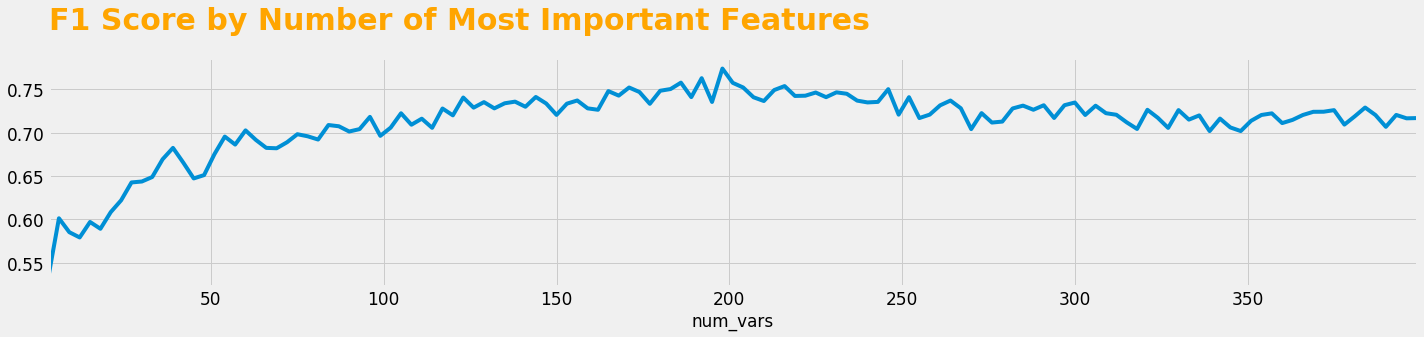

In [176]:
num_of_features_plot(feature_table_best)

In [177]:
test_200_6_gb = transform_test(model_200_6_gb)

In [178]:
model_best = GradientBoostingClassifier(n_estimators = 200, max_depth = 6)

In [179]:
train_best = train_200_6_gb[:,0:198]
train_best

array([[ 0.63, -0.29, -0.41, ..., -0.14, -0.14, -0.08],
       [ 1.05,  0.11, -0.41, ..., -0.14, -0.33, -0.08],
       [-0.5 , -0.29, -0.41, ..., -0.14, -0.33, -0.08],
       ..., 
       [-0.32, -0.29, -0.41, ..., -0.14,  0.04, -0.08],
       [ 0.82, -0.29,  2.45, ..., -0.14, -0.33, -0.08],
       [ 0.25,  7.65, -0.41, ..., -0.14,  0.04, -0.08]])

In [183]:
test_best = test_200_6_gb[:,0:198]
test_best

array([[ 0.63, -0.19, -0.3 , ..., -0.14, -0.06, -0.06],
       [ 2.73, -0.19, -0.3 , ..., -0.14, -0.58, -0.06],
       [-0.16, -0.19, -0.3 , ..., -0.14, -0.23, -0.06],
       ..., 
       [ 1.9 , -0.19, -0.3 , ..., -0.14, -0.58, -0.06],
       [-0.16, -0.19, -0.3 , ..., -0.14, -0.23, -0.06],
       [-0.27, -0.19, -0.3 , ..., -0.14, -0.41, -0.06]])

In [184]:
train_best.shape

(546, 198)

In [185]:
test_best.shape

(12753, 198)

In [186]:
train_label_reshape = train_label.reshape((len(train_label), 1))
train_label_reshape

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
      

In [187]:
def run_kfolds2(clf):
    kf = KFold(546, n_folds = 10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train,X_test = train_best[train_index], train_best[test_index]
        y_train,y_test = train_label_reshape[train_index], train_label_reshape[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        f1score = f1_score(y_test,predictions)
        outcomes.append(f1score)
        print ("Fold {0} accuracy: {1}".format(fold, f1score))
    
    mean_outcome = np.mean(outcomes)
    print ("Mean Accuracy: {0}".format(mean_outcome))   

In [188]:
run_kfolds2(model_best)

Fold 1 accuracy: 0.857142857143
Fold 2 accuracy: 0.775510204082
Fold 3 accuracy: 0.766666666667
Fold 4 accuracy: 0.786885245902
Fold 5 accuracy: 0.76
Fold 6 accuracy: 0.690909090909
Fold 7 accuracy: 0.813559322034
Fold 8 accuracy: 0.65
Fold 9 accuracy: 0.792452830189
Fold 10 accuracy: 0.590909090909
Mean Accuracy: 0.748403530783


In [189]:
## plot confusion matrix

In [190]:
x_train, x_vali, y_train, y_vali = train_test_split(train_best, train_label_reshape,
                                                         test_size = 0.2, random_state = 42)

In [191]:
model_best.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [192]:
predictions = model_best.predict(x_vali)

In [193]:
accuracy_score(predictions, y_vali)

0.78181818181818186

In [194]:
f1_score(predictions, y_vali)

0.79661016949152541

In [195]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print "Normalized confusion matrix"
    else:
        print "Confusion matrix without normalization"
        
    print cm
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label")

In [196]:
from sklearn.metrics import confusion_matrix

In [197]:
import itertools

In [198]:
matrix = confusion_matrix(y_vali, predictions)
np.set_printoptions(precision=2)

Confusion matrix without normalization
[[39  6]
 [18 47]]


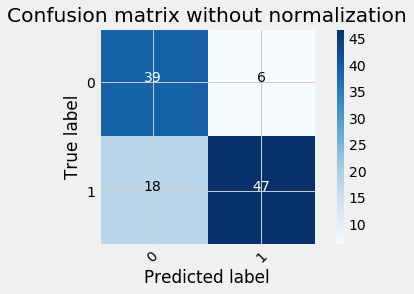

In [199]:
plt.figure()
plot_confusion_matrix(matrix, classes=[0,1],
                     title='Confusion matrix without normalization')

In [200]:
y_vali_reshape = y_vali.reshape((1, len(y_vali)))

In [201]:
y_vali_reshape[0]

array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.])

In [202]:
predictions

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.])

In [203]:
true_positive = sum((y_vali_reshape[0] == 1) & (predictions == 1))

In [204]:
true_positive

47

In [205]:
true_negative = sum((y_vali_reshape[0] == 0) & (predictions == 0))
true_negative

39

In [206]:
false_positive = sum((y_vali_reshape[0] == 0) & (predictions == 1))
false_positive

6

In [207]:
false_negative = sum((y_vali_reshape[0] == 1) & (predictions == 0))
false_negative

18

### Now we make the predictions on the transformed test data set

In [233]:
final_predictions = model_best.predict(test_best)
final_predictions

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [234]:
str(int(final_predictions[0]))

'1'

In [235]:
final_predictions.shape

(12753,)

In [236]:
predictions = []
for i in range(len(final_predictions)):
    predictions.append(str(int(final_predictions[i])))
    
predictions

['1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0'

In [237]:
output = pd.DataFrame({'predictions': predictions})
output.head()

,predictions
0,1
1,0
2,0
3,0
4,0


In [239]:
output.index = test_labels.index
output.head()

,predictions
546,1
547,0
548,0
549,0
550,0


In [241]:
output.to_csv('Yelp_predictions.csv')